In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
import numpy as np
import shap

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read the original training data
original_train_data = pd.read_csv('data/HW2_hr-analytics_train.csv')

# Shuffle the data every time when you run the code
shuffled_train_data = original_train_data.sample(frac=1)  # Shuffle without specifying a random state

# Split the shuffled data into train (80%) and test (20%)
train_data, test_data = train_test_split(shuffled_train_data, test_size=0.2)

# Encode non-numeric columns
train_data_encoded = pd.get_dummies(train_data, columns=['sales', 'salary'])
test_data_encoded = pd.get_dummies(test_data, columns=['sales', 'salary'])

# Check for missing values in the training data
missing_train = train_data_encoded.isna().any()
if missing_train.any():
    print("There are missing values in the training data.")
    print(missing_train)
    train_data_encoded.fillna(train_data_encoded.median(), inplace=True)
    print("Train data after filling missing values with median:")
    print(train_data_encoded)
else:
    print("No missing values in the training data.")

No missing values in the training data.


> **如果有缺失值，用中位數填補**

In [2]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data_encoded[['satisfaction_level', 'last_evaluation', 'number_project',
                                                        'average_montly_hours', 'time_spend_company', 'Work_accident',
                                                        'promotion_last_5years', 'sales_IT', 'sales_RandD',
                                                        'sales_accounting', 'sales_hr', 'sales_management',
                                                        'sales_marketing', 'sales_product_mng', 'sales_sales',
                                                        'sales_support', 'sales_technical', 'salary_high',
                                                        'salary_low', 'salary_medium']])
X_test_scaled = scaler.transform(test_data_encoded[['satisfaction_level', 'last_evaluation', 'number_project',
                                                    'average_montly_hours', 'time_spend_company', 'Work_accident',
                                                    'promotion_last_5years', 'sales_IT', 'sales_RandD',
                                                    'sales_accounting', 'sales_hr', 'sales_management',
                                                    'sales_marketing', 'sales_product_mng', 'sales_sales',
                                                    'sales_support', 'sales_technical', 'salary_high',
                                                    'salary_low', 'salary_medium']])

# Build a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train_scaled, train_data_encoded['left'])

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(test_data_encoded['left'], y_pred)
accuracy = accuracy_score(test_data_encoded['left'], y_pred)

# Format the accuracy with five digits after the decimal point
formatted_accuracy = '{:.5f}'.format(accuracy)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", formatted_accuracy)

Confusion Matrix:
[[1529   22]
 [  21  428]]
Accuracy: 0.97850


> **計算feature的重要性**  
> *1.Model-Specific Feature Importance*  
> *2.SHAP (SHapley Additive exPlanations)*  

1.
Feature Importances:
last_evaluation: 0.50113
number_project: 0.14670
average_montly_hours: 0.10409
time_spend_company: 0.09069
Work_accident: 0.13703
promotion_last_5years: 0.00116
left: 0.00035
sales_IT: 0.00201
sales_RandD: 0.00107
sales_accounting: 0.00014
sales_hr: 0.00108
sales_management: 0.00025
sales_marketing: 0.00061
sales_product_mng: 0.00040
sales_sales: 0.00169
sales_support: 0.00262
sales_technical: 0.00341
salary_high: 0.00083
salary_low: 0.00254
salary_medium: 0.00219
2.


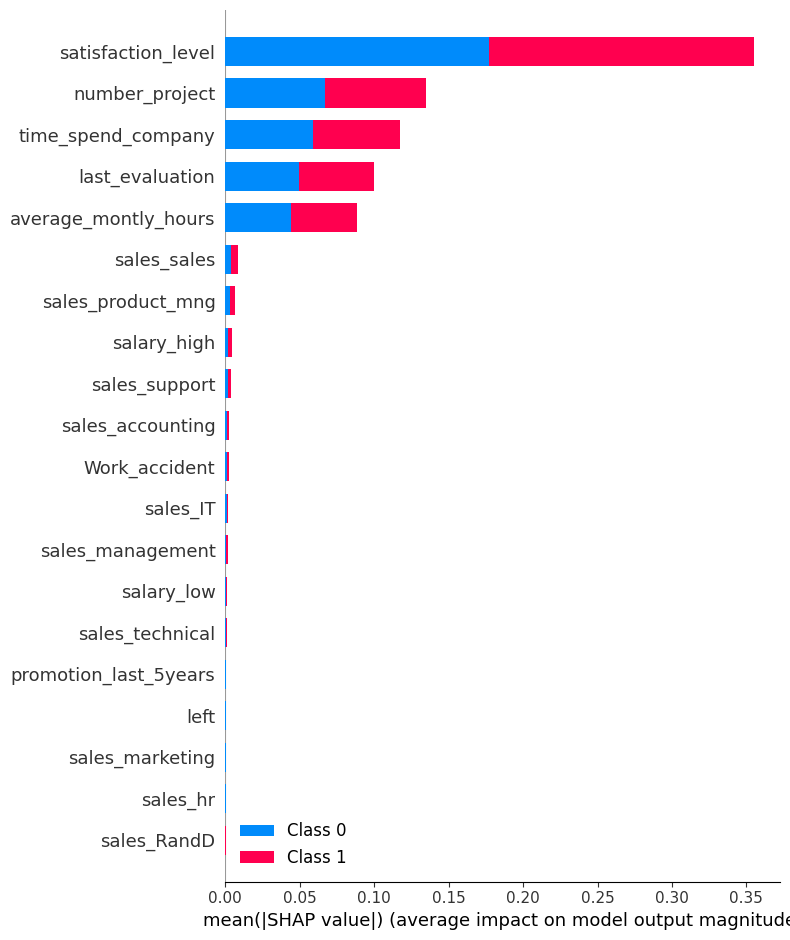

In [5]:
# Calculate feature importances
feature_importances = model.feature_importances_

# Print the feature importances
print("1.")
print("Feature Importances:")
for feature, importance in zip(train_data_encoded.columns[1:], feature_importances):
    print(f"{feature}: {importance:.5f}")

print("2.")
# Use SHAP for feature importance
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

# Summarize the feature importance
shap.summary_plot(shap_values, X_test_scaled, feature_names=train_data_encoded.columns)

---
- **依照兩種計算features重要性的方法得知，最重要的前兩種特徵是：**
> 1. last_evaluation
> 2. number_project

- **討論：**  
> - Logistic Regression的預測準確率大約是77%
> - Decision Tree的預測準確率大約是97%
> - 很明顯Decision Tree的預測準確率比較高，說明Decision Tree比較適合做為員工離職率的預測模型，可能是因為所有features未必能組成一個預測員工離職率的多項式，也就是說員工的離職率和這些features呈現的可能不具有某種明顯的線性關係。